In [8]:
from source import NPGC
import pandas as pd
from source import plot_marginal_original_vs_npgc

In [2]:
df = pd.read_csv("datasets/adult.csv") 
print(df.head())
df.info()

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [14]:
synth = NPGC(enforce_min_max_values=True) 

In [15]:
synth.fit(df)

In [5]:
synth.load("models/synthetic_model_1.pkl")

In [16]:
synthetic_df = synth.sample(num_rows=10000)

In [7]:
print(synthetic_df.head())
synthetic_df.info()

   age workclass  fnlwgt  education  education-num      marital-status  \
0   27   Private  229410  Bachelors              9  Married-civ-spouse   
1   35       NaN  263871  Bachelors             10           Separated   
2   66   Private  301112       11th             10            Divorced   
3   39   Private  254014        9th              9  Married-civ-spouse   
4   47   Private  223019  Bachelors              9  Married-civ-spouse   

          occupation relationship   race   sex  capital-gain  capital-loss  \
0       Craft-repair    Unmarried  White  Male             0             0   
1   Transport-moving      Husband  White  Male             0             0   
2    Exec-managerial      Husband  White  Male             0             0   
3     Prof-specialty      Husband  White  Male          2653             0   
4  Machine-op-inspct      Husband  White  Male             0             0   

   hours-per-week native-country  income  
0              25  United-States  <=50K.  


In [8]:
synthetic_df.to_csv("datasets/synthetic_data.csv", index=False)

In [9]:
synth.save("models/synthetic_model_1.pkl")

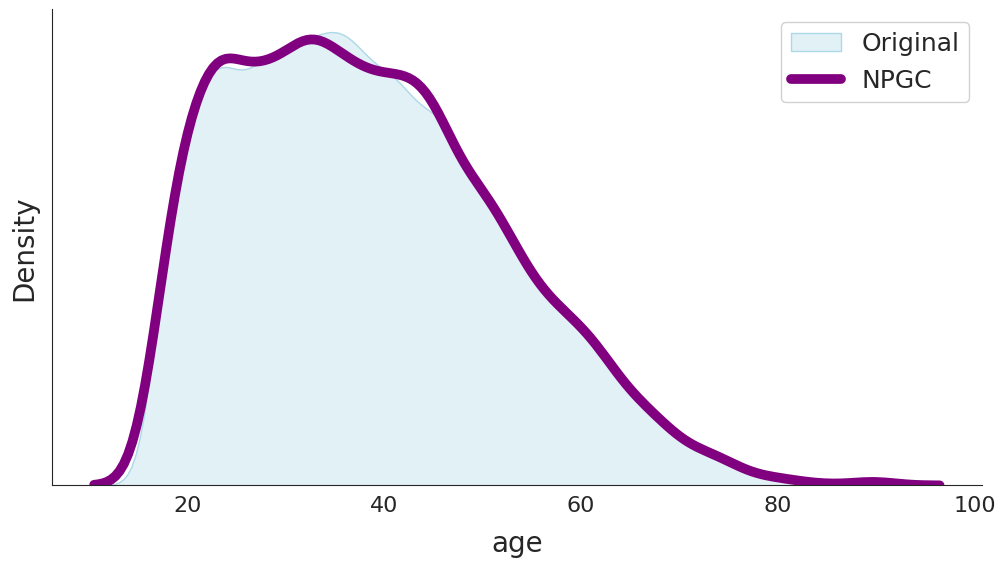

In [18]:
feature = "age"

original = df[feature]
non_param = synthetic_df[feature]
plot_marginal_original_vs_npgc(original,non_param,feature)